In [1]:
import pandas as pd
import numpy as np
tromso_temps = pd.read_csv('tromso_temps.csv', index_col=0)

In [2]:
tromso_temps['datetime'] = tromso_temps['month_'].astype(str) + '-' + tromso_temps['year_'].astype(str)
tromso_temps['datetime'] = pd.to_datetime(tromso_temps['datetime'])
tromso_temps.set_index('datetime', inplace=True)
tromso_temps.drop(columns=['month_', 'year_'], axis=1, inplace=True)
tromso_temps['mean_temp_celsius'] = tromso_temps['mean_temp_celsius'].astype(float).round(2)
tromso_temps = tromso_temps.iloc[:-6]
tromso_temps.dropna(inplace=True)

In [3]:
# create 120 features
for i in range(120, 240):
    tromso_temps[f'mean_temp_celsius - {i}'] = tromso_temps['mean_temp_celsius'].shift(i)

In [4]:
final = tromso_temps.dropna()

In [5]:
# features = ['mean_temp_celsius - 120']
features = final.columns[1:]

In [6]:
final.shape

(942, 121)

In [7]:
X_train = final[:780][features]
X_test = final[780:][features]

y_train = final[:780]['mean_temp_celsius']
y_test = final[780:]['mean_temp_celsius']

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((780, 120), (162, 120), (780,), (162,))

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt

In [10]:
m = LinearRegression()
l = Lasso(alpha=1)

In [11]:
m.fit(X_train, y_train)
l.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
m.score(X_train, y_train), l.score(X_train, y_train)

(0.886176850305467, 0.8754022685418411)

In [13]:
m.score(X_test, y_test), l.score(X_test, y_test)

(0.8908110193223179, 0.8950780061684814)

### Prediction for climat until 2029 in Tromso

In [14]:
size = tromso_temps.shape[0]#.iloc[['2009-06-01']]
tromso_temps.iloc[((size-0)-120):(size-0)]   # calculating 120 month in future
tromso_temps.iloc[((size-2)-120):(size-2)]   # calculating 118 month in future
tromso_temps.iloc[((size-4)-120):(size-4)]   # calculating 116 month in future

tromso_temps.iloc[((size-0)-120):(size-0)]['mean_temp_celsius'].values.tolist()
# calculating 118 month in future, getting the value and writing it into list

[12.66,
 13.04,
 8.69,
 2.19,
 0.52,
 -4.26,
 -3.06,
 -7.34,
 -4.49,
 1.59,
 7.2,
 7.48,
 11.84,
 10.02,
 8.14,
 3.58,
 -2.26,
 -2.96,
 -3.63,
 -4.11,
 -1.16,
 3.33,
 6.77,
 11.41,
 11.83,
 12.35,
 10.21,
 6.05,
 3.97,
 -0.63,
 -3.4,
 -2.72,
 0.01,
 -0.32,
 4.38,
 8.95,
 11.09,
 10.01,
 7.43,
 2.78,
 0.84,
 -3.93,
 -1.92,
 -3.29,
 -3.95,
 1.62,
 9.74,
 12.11,
 12.49,
 12.42,
 10.41,
 2.71,
 -0.29,
 -0.42,
 -5.56,
 0.45,
 -0.03,
 1.74,
 5.21,
 9.24,
 15.75,
 12.09,
 7.95,
 3.73,
 0.58,
 -1.83,
 -4.15,
 -0.83,
 1.63,
 2.66,
 6.7,
 7.95,
 11.87,
 13.36,
 9.83,
 4.96,
 1.64,
 0.24,
 -4.52,
 -1.67,
 0.52,
 3.47,
 8.01,
 9.31,
 12.64,
 10.92,
 9.96,
 4.53,
 0.5,
 0.92,
 -1.02,
 -2.49,
 -0.95,
 0.73,
 3.79,
 10.33,
 11.88,
 11.15,
 10.19,
 4.23,
 0.48,
 -1.72,
 -3.89,
 -4.08,
 -4.41,
 2.36,
 8.39,
 7.61,
 14.55,
 11.42,
 7.82,
 2.93,
 2.83,
 -1.56,
 -5.69,
 -4.04,
 -3.48,
 1.97,
 5.31,
 8.81]

In [15]:
#cols

In [16]:
tromso_slice = tromso_temps.iloc[((size-0)-120):(size-0)]
tromso_slice.head()

,mean_temp_celsius,mean_temp_celsius - 120,mean_temp_celsius - 121,mean_temp_celsius - 122,mean_temp_celsius - 123,mean_temp_celsius - 124,mean_temp_celsius - 125,mean_temp_celsius - 126,mean_temp_celsius - 127,mean_temp_celsius - 128,...,mean_temp_celsius - 230,mean_temp_celsius - 231,mean_temp_celsius - 232,mean_temp_celsius - 233,mean_temp_celsius - 234,mean_temp_celsius - 235,mean_temp_celsius - 236,mean_temp_celsius - 237,mean_temp_celsius - 238,mean_temp_celsius - 239
datetime,,,,,,,,,,,,,,,,,,,,,
2009-07-01,12.66,11.32,10.69,5.22,1.15,-1.92,-4.10,-3.47,-1.12,-1.72,...,4.08,2.18,-1.47,-0.29,-2.96,-4.32,0.49,2.28,7.94,12.19
2009-08-01,13.04,9.33,11.32,10.69,5.22,1.15,-1.92,-4.10,-3.47,-1.12,...,10.94,4.08,2.18,-1.47,-0.29,-2.96,-4.32,0.49,2.28,7.94
2009-09-01,8.69,9.37,9.33,11.32,10.69,5.22,1.15,-1.92,-4.10,-3.47,...,13.27,10.94,4.08,2.18,-1.47,-0.29,-2.96,-4.32,0.49,2.28
2009-10-01,2.19,4.44,9.37,9.33,11.32,10.69,5.22,1.15,-1.92,-4.10,...,12.49,13.27,10.94,4.08,2.18,-1.47,-0.29,-2.96,-4.32,0.49
2009-11-01,0.52,3.44,4.44,9.37,9.33,11.32,10.69,5.22,1.15,-1.92,...,8.16,12.49,13.27,10.94,4.08,2.18,-1.47,-0.29,-2.96,-4.32


In [17]:
temps_list = []
for i in range(0, 120, 1):
    temps_list.append(tromso_temps.iloc[((size-i)-120):(size-i)]['mean_temp_celsius'].values.tolist())#[i]

In [18]:
df = pd.DataFrame(temps_list)
df.set_index(tromso_slice.index, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
datetime,,,,,,,,,,,,,,,,,,,,,
2009-07-01,12.66,13.04,8.69,2.19,0.52,-4.26,-3.06,-7.34,-4.49,1.59,...,7.82,2.93,2.83,-1.56,-5.69,-4.04,-3.48,1.97,5.31,8.81
2009-08-01,8.49,12.66,13.04,8.69,2.19,0.52,-4.26,-3.06,-7.34,-4.49,...,11.42,7.82,2.93,2.83,-1.56,-5.69,-4.04,-3.48,1.97,5.31
2009-09-01,7.24,8.49,12.66,13.04,8.69,2.19,0.52,-4.26,-3.06,-7.34,...,14.55,11.42,7.82,2.93,2.83,-1.56,-5.69,-4.04,-3.48,1.97
2009-10-01,0.74,7.24,8.49,12.66,13.04,8.69,2.19,0.52,-4.26,-3.06,...,7.61,14.55,11.42,7.82,2.93,2.83,-1.56,-5.69,-4.04,-3.48
2009-11-01,-1.89,0.74,7.24,8.49,12.66,13.04,8.69,2.19,0.52,-4.26,...,8.39,7.61,14.55,11.42,7.82,2.93,2.83,-1.56,-5.69,-4.04


In [19]:
X_pred = df
ypred_df_lin = pd.DataFrame(m.predict(X_pred))    # temperature prediction for 01.07.2019 - 01.06.2029 for Tromso
ypred_df_lasso = pd.DataFrame(l.predict(X_pred))  # temperature prediction for 01.07.2019 - 01.06.2029 for Tromso, with Lasso function
ypred_df_lasso.set_index(df.index, inplace=True)
ypred_df_lin.set_index(df.index, inplace=True)

In [20]:
ypred_df_lasso.index = ypred_df_lasso.index + pd.offsets.Day(10*366)
ypred_df_lin.index = ypred_df_lin.index + pd.offsets.Day(10*366)

/home/pepper/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


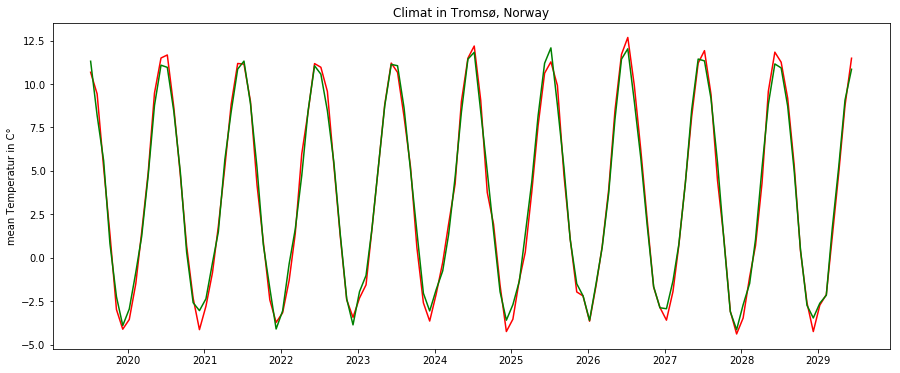

In [21]:
plt.figure(figsize=(15,6))
plt.title('Climat in Tromsø, Norway')
plt.plot(ypred_df_lin.index, ypred_df_lin[0], 'r')
plt.plot(ypred_df_lin.index, ypred_df_lasso[0], 'g')
plt.ylabel('mean Temperatur in C°')
plt.show()

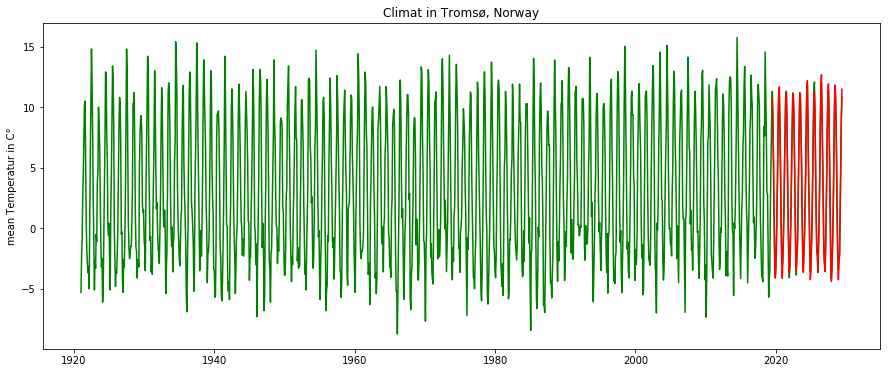

In [22]:
# adding historical data and prediction together in one dataframe
tromso_past = tromso_temps['mean_temp_celsius']
tromso_climat = pd.concat([tromso_past, ypred_df_lasso])
plt.figure(figsize=(15,6))
plt.title('Climat in Tromsø, Norway')
plt.plot(tromso_climat.index, tromso_climat[0], 'g')
plt.plot(ypred_df_lin.index, ypred_df_lin[0], 'r')
plt.ylabel('mean Temperatur in C°')
plt.show()

In [23]:
tromso_climat['Degree_Celsius'] = tromso_climat[0]
tromso_climat = tromso_climat[['Degree_Celsius']]

In [24]:
# slicing predicted values, to pick explicit date or time periode
tromso_climat['2021']
tromso_climat['3/2014':'4/2014']
tromso_climat['1/2009':'12/2019'].resample('Y').mean()

,Degree_Celsius
datetime,
2009-12-31,3.380833
2010-12-31,2.478333
2011-12-31,4.699167
2012-12-31,2.926667
2013-12-31,4.302500
2014-12-31,4.110000
2015-12-31,4.655000
2016-12-31,4.549167
2017-12-31,3.883333


### Plot Trend to see global warming

In [25]:
tromso_climat['Degree_Celsius']['2021'].mean()
tromso_climat.shape

(1301, 1)

In [26]:
# 1. calc. the mean temp. of 109 years
tromso_climat['mean'] = tromso_climat['Degree_Celsius'].mean()

In [27]:
# 2. calc. the mean temp. of every year for 109 years
mean_year = []
for i in range(109):
    mean_year.append(tromso_climat['Degree_Celsius'][str(int('1921')+i)].mean())
tromso_climat['mean_year'] = 0.0
for i in range(109):
    tromso_climat['mean_year'][str(int('1921')+i)] = mean_year[i]

In [28]:
# 3. calc. the last value of every year for 109 years
last = []
for i in range(108):
    last.append(tromso_climat['Degree_Celsius']['12-'+str(int('1921')+i)])
tromso_climat['last_in_year'] = 0.0
for i in range(108):
    tromso_climat['last_in_year'][str(int('1921')+i)] = last[i]

In [29]:
tromso_climat['trend_120'] = np.nan
tromso_climat['trend_120']['1921-01'] = tromso_climat['mean_year']['1921-01']
tromso_climat['trend_120']['1921-02'] = tromso_climat['mean_year']['1921-02']
tromso_climat['trend_120'][-2] = tromso_climat['mean_year'][-2]
tromso_climat['trend_120'][-1] = tromso_climat['mean_year'][-1]

In [30]:
tromso_climat['trend_120'] = tromso_climat['trend_120'].interpolate(method='linear')

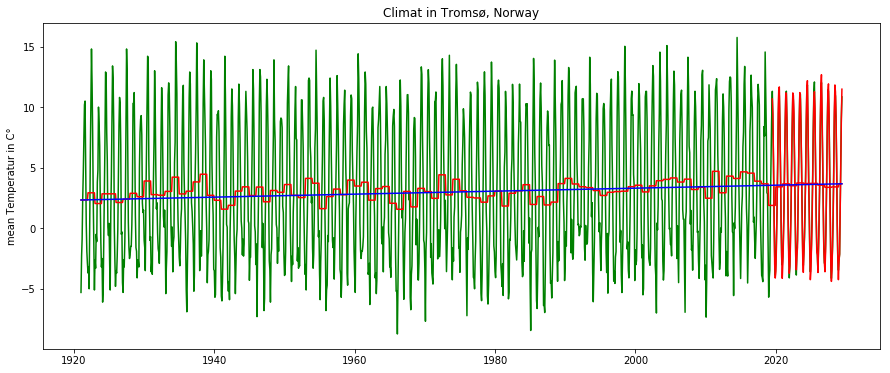

In [31]:
plt.figure(figsize=(15,6))
plt.title('Climat in Tromsø, Norway')
plt.plot(tromso_climat.index, tromso_climat['Degree_Celsius'], 'g')
plt.plot(ypred_df_lin.index, ypred_df_lin[0], 'r')
plt.plot(tromso_climat.index, tromso_climat['mean_year'], 'r')
plt.plot(tromso_climat.index, tromso_climat['trend_120'], 'b')
plt.ylabel('mean Temperatur in C°')
plt.show()

In [32]:
# calc. slope of climat change
#pct_change_df['pct_change'] = tromso_climat['pct_change']

In [33]:
#use fbprophet for prediction and compare
from fbprophet import Prophet
#create df for prophet
fb_df = tromso_climat.copy()
col= tromso_climat.columns
fb_df['ds'], fb_df['y'] = tromso_climat.index, tromso_climat['Degree_Celsius']
fb_df.reset_index(drop=True)
fb_df.drop(col, inplace=True, axis=1)
fb_df = fb_df.iloc[:-((12*9)+12)]

In [34]:
m = Prophet()
m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/pepper/Applications/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



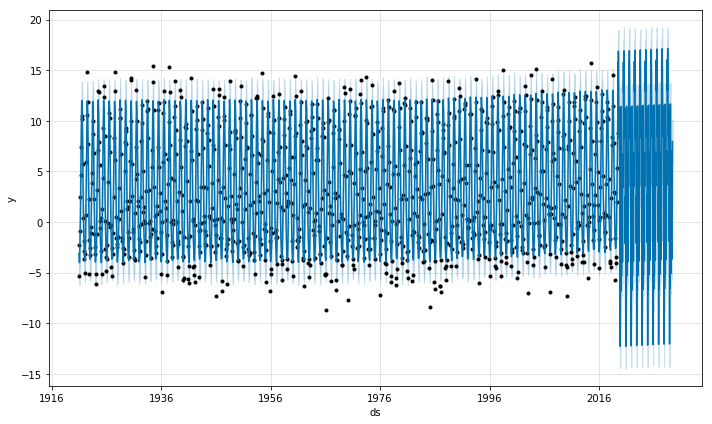

In [35]:
future = m.make_future_dataframe(periods=3650)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
fig1 = m.plot(forecast)

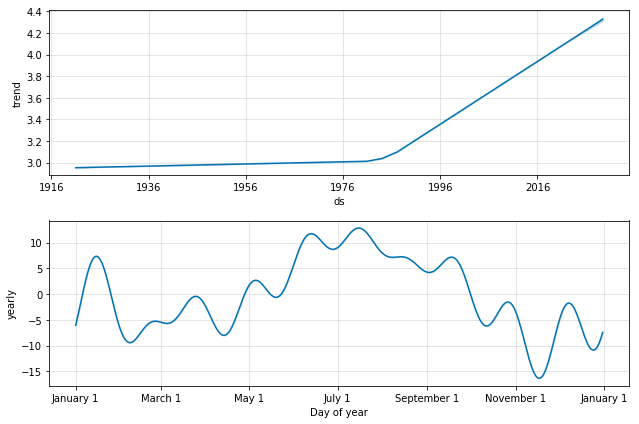

In [36]:
fig2 = m.plot_components(forecast)

In [39]:
import plotly.io as pio

In [44]:
import plotly.graph_objects as go
fig4 = go.Figure([go.Scatter(x=forecast['ds'], y=forecast['trend'])])
fig4.show()